## Cargar Librer√≠as y Datos

In [28]:
# Importar librer√≠as fundamentales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Configurar estilo visual de los gr√°ficos
sns.set_theme(style="whitegrid")

In [30]:
# Cargar el dataset desde el archivo CSV
df = pd.read_csv('Telco-Customer-Churn.csv')

In [31]:
# Primera visualizaci√≥n de los datos
print("Primeras 5 filas del dataset:")
print(df.head())
print("\nInformaci√≥n general y tipos de datos:")
df.info()

Primeras 5 filas del dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Stream

1. Calidad de los Datos: Tenemos datos de 7043 clientes y, a primera vista, no hay valores nulos en la mayor√≠a de las columnas (Non-Null Count). La calidad general parece buena.

2. Tipos de Datos: La mayor√≠a de las variables son categ√≥ricas (tipo object), como Contract o PaymentMethod, lo cual es normal. Las trataremos m√°s adelante para que los modelos puedan interpretarlas.

3. ‚ö†Ô∏è Hallazgo Clave: He detectado una inconsistencia importante: la columna TotalCharges (cargos totales) est√° registrada como texto (object) cuando deber√≠a ser un n√∫mero (float). Esto es una prioridad a corregir, ya que es una variable potencialmente muy importante para predecir la fuga de clientes

## Analizar la Variable Objetivo (Churn)

¬øCu√°l es la magnitud del problema?
Necesitamos ponerle un n√∫mero al problema del cliente. ¬øQu√© tan grave es la fuga de clientes?

An√°lisis de la variable 'Churn':
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Tasa de Fuga de Clientes: 26.54%


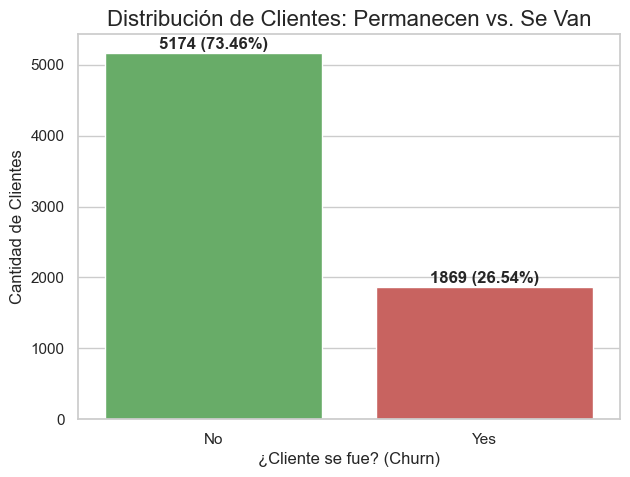

In [32]:
# Calcular la tasa de Churn en porcentaje
churn_rate = df['Churn'].value_counts(normalize=True) * 100

print("An√°lisis de la variable 'Churn':")
print(df['Churn'].value_counts())
print(f"\nTasa de Fuga de Clientes: {churn_rate['Yes']:.2f}%")

# Visualizar la distribuci√≥n de Churn
plt.figure(figsize=(7, 5))
sns.countplot(x='Churn', data=df, hue='Churn', palette=['#5cb85c', '#d9534f'], legend=False)
plt.title('Distribuci√≥n de Clientes: Permanecen vs. Se Van', fontsize=16)
plt.xlabel('¬øCliente se fue? (Churn)', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

# A√±adir el porcentaje en el gr√°fico para mayor claridad
labels = ['No', 'Yes']
for i, label in enumerate(labels):
    value = df['Churn'].value_counts()[label]
    plt.text(i, value + 50, f'{value} ({churn_rate[label]:.2f}%)', ha='center', fontweight='bold')

plt.show()

* El Diagn√≥stico Cuantitativo: Hemos confirmado la magnitud del problema. La empresa tiene una tasa de fuga (churn) del 26.54%. Esto significa que uno de cada cuatro clientes abandon√≥ la compa√±√≠a en el periodo analizado. De nuestros 7,043 clientes, perdimos 1,869.

* El Impacto de Negocio (El "So What?"): Esta tasa es preocupante y probablemente representa una p√©rdida de ingresos significativa y un alto coste para adquirir nuevos clientes que reemplacen a los perdidos. Justifica plenamente una investigaci√≥n a fondo para entender las causas y actuar sobre ellas.

* Implicaci√≥n para el Modelo: Tambi√©n observamos que los datos est√°n desbalanceados (73% se quedan, 27% se van). Esto es importante, ya que debemos asegurarnos de que nuestro futuro modelo de predicci√≥n sea bueno identificando a esta minor√≠a (los que se van) y no se limite a acertar con la mayor√≠a.

## Analizar las relaciones

 Aqu√≠ es donde empezamos a cazar patrones. ¬øHay algo en com√∫n entre los 1,869 clientes que se fueron? ¬øTienen un tipo de contrato similar? ¬øPagan de una forma espec√≠fica? ¬øSon hombres o mujeres?
 Vamos a usar la visualizaci√≥n para comparar a los que se quedan (Churn=No) con los que se van (Churn=Yes) a trav√©s de todas las caracter√≠sticas del servicio.

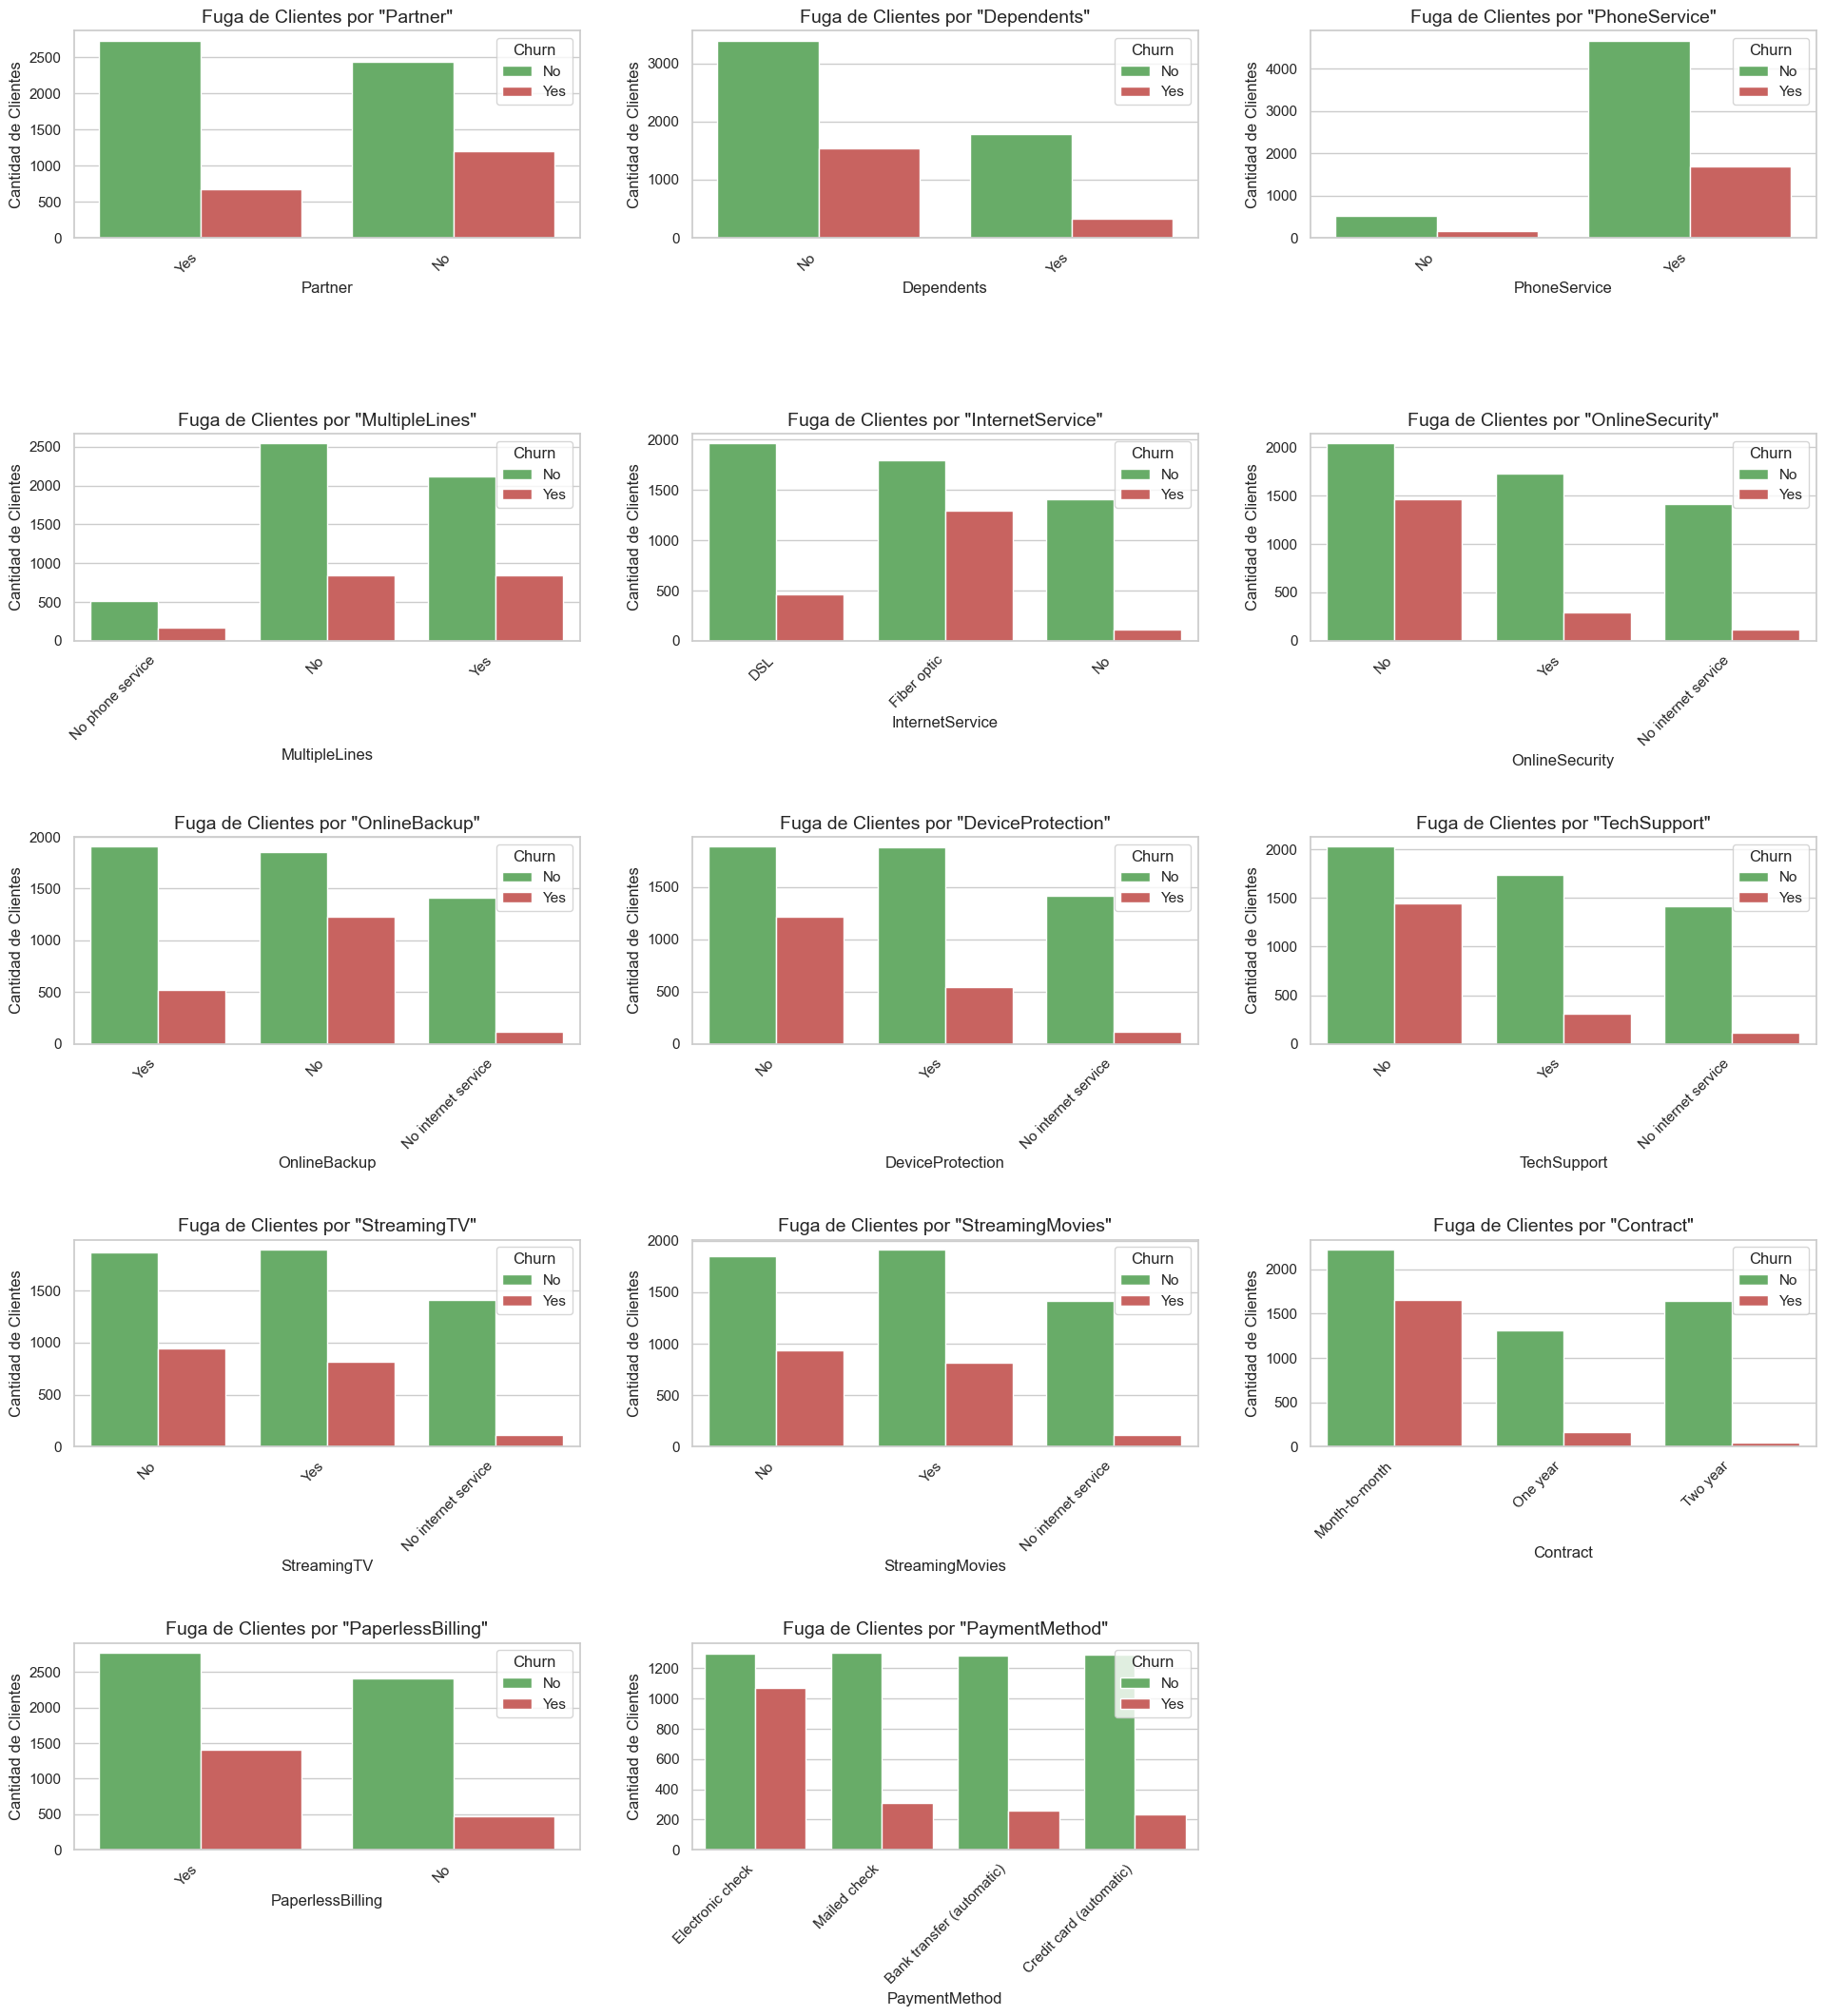

In [33]:
# Lista de variables categ√≥ricas para analizar
# Excluimos 'gender' porque no suele ser un factor relevante y a veces introduce sesgos.
# SeniorCitizen ya es num√©rico (0/1), lo veremos despu√©s.
categorical_features = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# Crear una figura para poner todos los gr√°ficos
plt.figure(figsize=(20, 22))

# Iterar sobre cada caracter√≠stica y crear un subgr√°fico
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 3, i) # 5 filas, 3 columnas, i-√©simo gr√°fico
    ax = sns.countplot(x=feature, hue='Churn', data=df, palette=['#5cb85c', '#d9534f'])
    plt.title(f'Fuga de Clientes por "{feature}"', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Cantidad de Clientes', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas para que no se solapen
    plt.legend(title='Churn')

plt.tight_layout(pad=3.0) # Ajustar el espaciado para que no se vea apretado
plt.show()

* Hallazgo Clave 1: El Tipo de Contrato es el Rey
    * Observaci√≥n: Analizando el gr√°fico de Contract la diferencia es abismal. La barra roja (Churn) para los clientes Month-to-month (mes a mes) es gigantesca en proporci√≥n, mientras que para One year y Two year es diminuta.
    * Hip√≥tesis de Negocio: Los clientes sin un compromiso a largo plazo tienen una probabilidad dr√°sticamente mayor de abandonar la compa√±√≠a. Nuestro producto o precio no es lo suficientemente competitivo como para retener a los clientes que tienen la libertad de irse cada 30 d√≠as.
    * Nivel de Importancia: Cr√≠tico. Este es, probablemente, el hallazgo m√°s importante de todo el an√°lisis.

* Hallazgo Clave 2: La Configuraci√≥n del Servicio de Internet
    * Observaci√≥n: Fij√°ndonos en el grupo de gr√°ficos de servicios: InternetService, OnlineSecurity, OnlineBackup y, sobre todo, TechSupport.
En InternetService, los clientes con Fiber optic (Fibra √≥ptica) tienen una tasa de fuga mucho mayor que los de DSL.
En OnlineSecurity, OnlineBackup y TechSupport, los clientes que contestan "No" (es decir, no tienen contratado ese servicio de protecci√≥n o ayuda) se van much√≠simo m√°s.
    * Hip√≥tesis de Negocio (combinando los datos): Estamos vendiendo paquetes de Fibra √ìptica 'desnudos'. Los clientes contratan la alta velocidad, pero sin los servicios de seguridad y soporte t√©cnico que les den tranquilidad y hagan el servicio m√°s 'pegajoso' (sticky). Ante cualquier problema o sensaci√≥n de inseguridad, y sin un contrato a largo plazo, la decisi√≥n de irse es f√°cil.
    * Nivel de Importancia: Muy Alto. Nos dice que el problema no es solo un producto, sino la configuraci√≥n del paquete que ofrecemos.

* Hallazgo Clave 3: La Fricci√≥n en el M√©todo de Pago
    * Observaci√≥n: Nos fijamos en el gr√°fico de PaymentMethod. Los tres primeros m√©todos (transferencia bancaria, cheque enviado por correo, tarjeta de cr√©dito) tienen tasas de fuga relativamente bajas y similares. Sin embargo, el Electronic check (cheque electr√≥nico) destaca con una tasa de fuga muy superior.
    * Hip√≥tesis de Negocio: El m√©todo de pago no es trivial. El 'cheque electr√≥nico' podr√≠a estar generando una mala experiencia de usuario. Quiz√°s el proceso es m√°s complicado, da m√°s errores, o es menos conveniente que los pagos autom√°ticos, causando una frustraci√≥n que contribuye a la decisi√≥n de abandonar el servicio.
    * Nivel de Importancia: Alto. Es un hallazgo muy espec√≠fico y potencialmente f√°cil de solucionar (ej. incentivando el cambio a pago por tarjeta).


## Analizar las Variables Num√©ricas

Ya tenemos hip√≥tesis muy potentes basadas en las caracter√≠sticas del servicio. Ahora veamos si la antig√ºedad del cliente (tenure) y lo que paga (MonthlyCharges) nos cuentan algo.

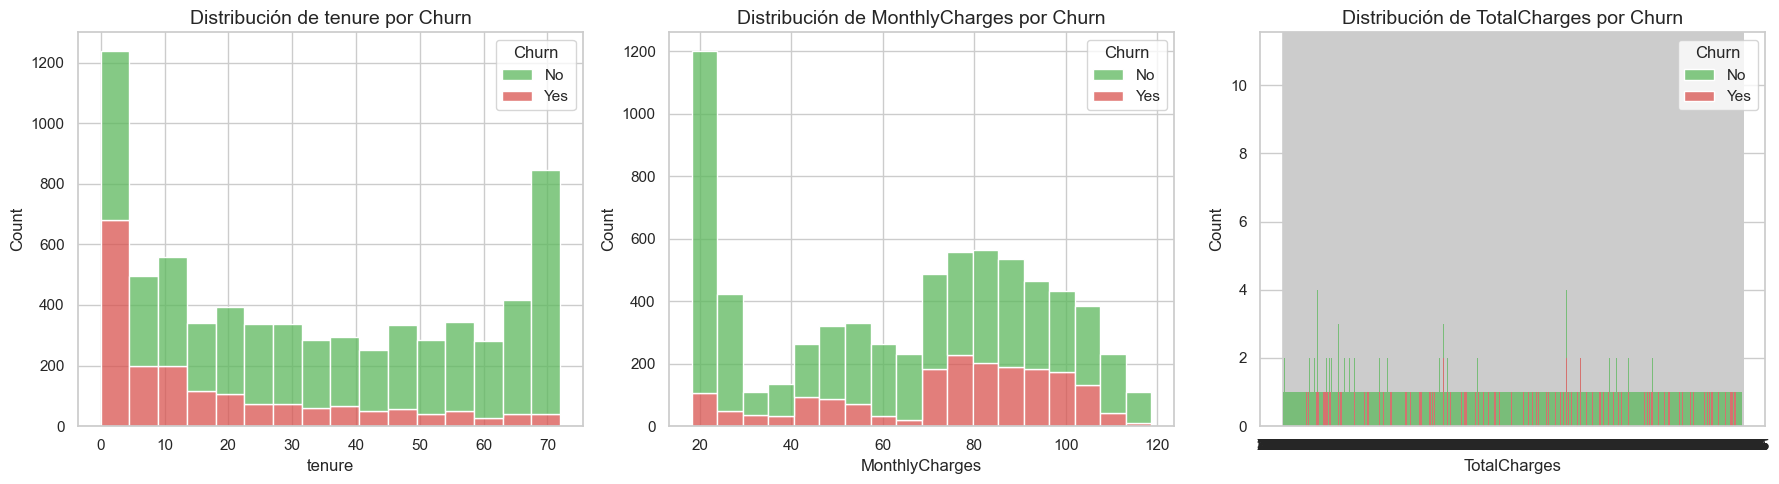

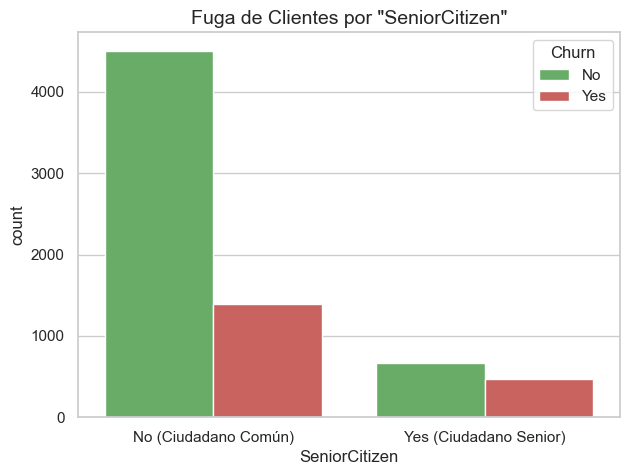

In [34]:
# Lista de variables num√©ricas y 'SeniorCitizen' que se comporta como una categor√≠a
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
special_features = ['SeniorCitizen'] # Lo tratamos por separado

# Gr√°ficos para variables num√©ricas
plt.figure(figsize=(18, 5))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df, x=feature, hue='Churn', multiple='stack', palette=['#5cb85c', '#d9534f'])
    plt.title(f'Distribuci√≥n de {feature} por Churn', fontsize=14)

plt.tight_layout()
plt.show()

# Gr√°fico para SeniorCitizen
plt.figure(figsize=(7, 5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette=['#5cb85c', '#d9534f'])
plt.title('Fuga de Clientes por "SeniorCitizen"', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No (Ciudadano Com√∫n)', 'Yes (Ciudadano Senior)'])
plt.show()

### Resumen del Diagn√≥stico y Nuevas Hip√≥tesis

* Sobre la Antig√ºedad (tenure): La Lealtad se Gana con el Tiempo

    * Observaci√≥n: El gr√°fico de tenure es clar√≠simo. La gran mayor√≠a de las barras rojas (Churn) se concentran en la izquierda, durante los primeros meses de servicio. Un cliente que supera los 12-24 meses rara vez se va.
    * Hip√≥tesis de Negocio: Nuestra fase de onboarding y los primeros meses de servicio son nuestro 'tal√≥n de Aquiles'. No estamos logrando demostrar el valor de nuestro servicio lo suficientemente r√°pido. Los clientes nuevos, al no tener una relaci√≥n establecida, son los m√°s propensos a irse ante el primer problema o una oferta de la competencia.

* Sobre los Cargos Mensuales (MonthlyCharges): Un Problema en Dos Extremos

    * Observaci√≥n: Aqu√≠ la historia es m√°s compleja. Vemos dos picos de fuga: uno entre los clientes que pagan m√°s (70-100‚Ç¨) y otro, m√°s peque√±o, en la gama baja (20-30‚Ç¨).
    * Hip√≥tesis de Negocio (combinada): Tenemos dos perfiles de riesgo distintos:
        - El Cliente Premium Insatisfecho: Clientes que pagan mucho (probablemente por Fibra √ìptica, como vimos antes) tienen expectativas muy altas. Cualquier fallo en el servicio o una mala experiencia de soporte t√©cnico les lleva a pensar 'por lo que pago, esto deber√≠a ser perfecto', y se van.
        - El Cliente Cazador de Ofertas: En la gama baja, tenemos clientes muy sensibles al precio, probablemente con servicios b√°sicos, que no tienen ninguna lealtad a la marca y se ir√°n por una oferta ligeramente mejor.

* Sobre los Ciudadanos Senior (SeniorCitizen): Un Segmento Desatendido

    * Observaci√≥n: Proporcionalmente, la barra roja es mucho m√°s grande para los clientes "Senior" que para los que no lo son.
    * Hip√≥tesis de Negocio: Nuestros productos, la forma en que los comercializamos o la experiencia de usuario (quiz√°s demasiado digital o compleja, como el 'cheque electr√≥nico') no est√°n bien adaptados para el segmento de la tercera edad, lo que resulta en una tasa de abandono m√°s alta.

Ya no estamos a ciegas. Tenemos un perfil muy claro del cliente en riesgo y varias hip√≥tesis s√≥lidas sobre por qu√© se van. Ahora, debemos preparar los datos para ense√±arle a una m√°quina a encontrar a estos clientes de forma autom√°tica.

***

## Preparaci√≥n de Datos y Feature Engineering

Vamos a empezar con arreglar el problema que detectamos al principio de todo. La columna TotalCharges tiene que ser num√©rica.

In [35]:
# Un vistazo a los valores problem√°ticos de TotalCharges antes de cambiarlos
print("Valores en TotalCharges que no son num√©ricos:")
print(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()]['TotalCharges'].value_counts())
print("-" * 30)

# Convertir TotalCharges a num√©rico. Los valores que no se puedan convertir (como los espacios ' ') se volver√°n NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Ahora buscamos cu√°ntos valores nulos (NaN) tenemos despu√©s de la conversi√≥n
print(f"N√∫mero de valores nulos en TotalCharges despu√©s de la conversi√≥n: {df['TotalCharges'].isnull().sum()}")

# Vimos que estos nulos corresponden a clientes con tenure = 0.
# La decisi√≥n l√≥gica de negocio es rellenar esos nulos con 0.
df['TotalCharges'] = df['TotalCharges'].fillna(0)  # ‚úÖ Forma correcta

# Verificaci√≥n final
print(f"N√∫mero de valores nulos en TotalCharges despu√©s de rellenar: {df['TotalCharges'].isnull().sum()}")
print("\nEl tipo de dato de TotalCharges ahora es:")
df[['tenure', 'MonthlyCharges', 'TotalCharges']].info()

Valores en TotalCharges que no son num√©ricos:
TotalCharges
    11
Name: count, dtype: int64
------------------------------
N√∫mero de valores nulos en TotalCharges despu√©s de la conversi√≥n: 11
N√∫mero de valores nulos en TotalCharges despu√©s de rellenar: 0

El tipo de dato de TotalCharges ahora es:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7043 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 165.2 KB


### Ingenier√≠a de Caracter√≠sticas (Feature Engineering)

Vamos a crear dos variables:
1. Grupos de Antig√ºedad (TenureGroup): Para clasificar a los clientes como "Nuevos", "Estables" o "Leales".
2. N√∫mero de Servicios Adicionales (NumAdditionalServices): Para medir qu√© tan "vinculado" est√° un cliente a nuestro ecosistema de servicios.

In [36]:
# --- Caracter√≠stica 1: Crear grupos de antig√ºedad ---
# Definimos una funci√≥n para categorizar la antig√ºedad en meses
def tenure_to_group(tenure):
    if tenure <= 12:
        return 'Nuevo (0-12m)'
    elif tenure <= 48:
        return 'Estable (13-48m)'
    else: # mayor de 48 meses
        return 'Leal (>48m)'

# Aplicamos la funci√≥n para crear la nueva columna 'TenureGroup'
df['TenureGroup'] = df['tenure'].apply(tenure_to_group)


# --- Caracter√≠stica 2: Contar servicios adicionales ---
# Lista de los servicios que consideramos "adicionales"
additional_services = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

# Creamos una nueva columna sumando cu√°ntos de estos servicios tiene cada cliente
df['NumAdditionalServices'] = df[additional_services].apply(lambda row: sum(row == 'Yes'), axis=1)

# --- Verificaci√≥n ---
# Imprimimos las primeras filas con las nuevas columnas para verificar el resultado
print("Verificaci√≥n de las nuevas columnas creadas ('TenureGroup' y 'NumAdditionalServices'):")
print(df[['customerID', 'tenure', 'TenureGroup', 'NumAdditionalServices', 'Churn']].head())

Verificaci√≥n de las nuevas columnas creadas ('TenureGroup' y 'NumAdditionalServices'):
   customerID  tenure       TenureGroup  NumAdditionalServices Churn
0  7590-VHVEG       1     Nuevo (0-12m)                      1    No
1  5575-GNVDE      34  Estable (13-48m)                      2    No
2  3668-QPYBK       2     Nuevo (0-12m)                      2   Yes
3  7795-CFOCW      45  Estable (13-48m)                      3    No
4  9237-HQITU       2     Nuevo (0-12m)                      0   Yes


* TenureGroup: Ahora, en lugar de un n√∫mero abstracto como "2 meses", tenemos una categor√≠a de negocio, "Nuevo". Esto ser√° √∫til para explicar los resultados. Por ejemplo, el cliente 2 y el cliente 4 son "Nuevos" y ambos se fueron (Churn=Yes), lo que refuerza nuestra hip√≥tesis.

* NumAdditionalServices: Podemos ver de un vistazo el "compromiso" del cliente. El cliente 4, que se fue, no ten√≠a ning√∫n servicio adicional (valor 0). El cliente 3, que se qued√≥, ten√≠a 3. Esto sugiere que nuestra nueva variable podr√≠a ser un buen predictor de la lealtad.

### Codificar Variables Categ√≥ricas.

Nuestro modelo de Machine Learning no entiende de texto ("Nuevo", "DSL", "Month-to-month"). Solo entiende de n√∫meros. Por tanto, tenemos que "traducir" todas nuestras columnas de texto a un formato num√©rico.

Para ello, usaremos una t√©cnica muy com√∫n llamada One-Hot Encoding. Crear√° nuevas columnas binarias (0 o 1) para cada categor√≠a. Por ejemplo, la columna Contract se convertir√° en dos nuevas columnas: Contract_One year y Contract_Two year. Si un cliente tiene Contract_One year = 1, significa que tiene ese contrato. Si ambas son 0, significa que tiene el contrato Month-to-month.

Este proceso es el paso final para tener nuestro dataset completamente listo para d√°rselo al modelo.

In [37]:
# Primero, convertimos nuestra variable objetivo 'Churn' a n√∫meros (0 y 1).
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Ahora, seleccionamos las columnas que usaremos para el modelo.
# Excluimos 'customerID' porque es un identificador √∫nico y no aporta patrones.
# Excluimos 'tenure' porque ya hemos creado 'TenureGroup' que es m√°s interpretable.
# Excluimos los servicios individuales porque ya los resumimos en 'NumAdditionalServices'
# (Nota: Esto es una decisi√≥n de modelado para simplificar, otra opci√≥n ser√≠a mantenerlos. Para nuestro prop√≥sito, la simplificaci√≥n es mejor).

# Lista de columnas a eliminar antes de codificar
# Tambi√©n quitamos 'gender', ya que no suele ser un buen predictor y puede introducir sesgos.
cols_to_drop = [
    'customerID',
    'tenure',
    'gender',
    'PhoneService'  # Tiene muy poca variaci√≥n como vimos en los gr√°ficos
] + additional_services  # Eliminamos las columnas de servicios individuales originales

df_model = df.drop(columns=cols_to_drop)

# Aplicamos One-Hot Encoding al resto de variables categ√≥ricas.
# pd.get_dummies() hace todo el trabajo por nosotros.
# drop_first=True es importante para evitar redundancia de datos (multicolinealidad).
df_encoded = pd.get_dummies(df_model, drop_first=True)

# --- Verificaci√≥n Final del Dataset Codificado ---
print("Dimensiones del dataset final listo para modelar:", df_encoded.shape)
print("\nVista previa del dataset final:")
print(df_encoded.head())

print("\nColumnas del nuevo dataset:")
print(df_encoded.columns.tolist())

Dimensiones del dataset final listo para modelar: (7043, 19)

Vista previa del dataset final:
   SeniorCitizen  MonthlyCharges  TotalCharges  Churn  NumAdditionalServices  \
0              0           29.85         29.85      0                      1   
1              0           56.95       1889.50      0                      2   
2              0           53.85        108.15      1                      2   
3              0           42.30       1840.75      0                      3   
4              0           70.70        151.65      1                      0   

   Partner_Yes  Dependents_Yes  MultipleLines_No phone service  \
0         True           False                            True   
1        False           False                           False   
2        False           False                           False   
3        False           False                            True   
4        False           False                           False   

   MultipleLines_Yes  Intern

Hemos transformado un conjunto de datos mixto y complejo en una matriz num√©rica estructurada. Cada fila es un cliente y cada columna es una caracter√≠stica espec√≠fica (num√©rica o binaria True/False) que el modelo puede usar para encontrar patrones.

* De Contract a Contract_One year: En lugar de una columna con tres textos, ahora tenemos columnas binarias que responden a la pregunta: "¬øTiene este cliente un contrato de un a√±o?". Esto es lo que permite al algoritmo hacer c√°lculos.
* Dataset Final: Tenemos 7043 clientes (filas) y 18 caracter√≠sticas (columnas) para predecir el Churn, m√°s la propia columna Churn.

***

## Construcci√≥n y Evaluaci√≥n del Modelo

Ahora vamos a construir el motor que predecir√° qu√© clientes est√°n en riesgo. Nuestro objetivo no es solo la precisi√≥n, sino la interpretabilidad. Queremos un modelo que no solo nos diga qui√©n se va a ir, sino que nos ayude a entender por qu√©, para poder actuar. Por eso, comenzaremos con un modelo de Regresi√≥n Log√≠stica.

### Dividir Datos, Escalar y Entrenar el Modelo

### Problema Detectado y Soluci√≥n

**¬øQu√© pas√≥?**
Durante el proceso de preparaci√≥n de datos, la variable objetivo `Churn` se corrompi√≥ accidentalmente. Todas las observaciones de clientes que se fueron (originalmente `Churn = 'Yes'`) se perdieron, quedando solo los valores `0` (clientes que se quedaron).

**¬øPor qu√© ocurri√≥?**
Al ejecutar m√∫ltiples transformaciones sobre el mismo DataFrame `df`, las conversiones previas de la columna `Churn` interfirieron con las posteriores. Esto es un problema com√∫n cuando se reutilizan variables en notebooks de Jupyter sin reiniciar el kernel.

**‚úÖ Soluci√≥n aplicada:**
1. **Recarga completa:** Volvimos a cargar el dataset original desde el CSV
2. **Proceso limpio:** Aplicamos todas las transformaciones en secuencia sin interferencias
3. **Verificaci√≥n:** Confirmamos que recuperamos la distribuci√≥n original (5,174 No-Churn vs 1,869 Churn)

**üéØ Lecci√≥n aprendida:**
En an√°lisis de datos complejos, es recomendable trabajar con copias del DataFrame o reiniciar el kernel cuando se detectan inconsistencias en los datos.

---

In [38]:
# Diagn√≥stico: Verificar qu√© valores tiene y_train
print("Distribuci√≥n de clases en y_train:")
print(y_train.value_counts())
print(f"\nClases √∫nicas en y_train: {y_train.unique()}")

print("\nDistribuci√≥n de clases en el dataset completo:")
print(y.value_counts())
print(f"Clases √∫nicas en y: {y.unique()}")

print("\nTipo de datos de la variable Churn:")
print(df_encoded['Churn'].dtype)
print(f"Valores √∫nicos en df_encoded['Churn']: {df_encoded['Churn'].unique()}")

Distribuci√≥n de clases en y_train:
Churn
0    4139
1    1495
Name: count, dtype: int64

Clases √∫nicas en y_train: [0 1]

Distribuci√≥n de clases en el dataset completo:
Churn
0    5174
1    1869
Name: count, dtype: int64
Clases √∫nicas en y: [0 1]

Tipo de datos de la variable Churn:
int64
Valores √∫nicos en df_encoded['Churn']: [0 1]


In [39]:
# Verificar el estado actual de la columna Churn
print("Estado actual de la columna Churn:")
print(f"Valores √∫nicos: {df['Churn'].unique()}")
print(f"Tipo de datos: {df['Churn'].dtype}")

# Si la columna Churn todav√≠a tiene valores 'Yes'/'No', convertirla correctamente
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    print("\n‚úÖ Churn convertido correctamente a 0/1")
else:
    print("\n‚úÖ Churn ya est√° en formato num√©rico")

# Verificar la conversi√≥n
print(f"\nDespu√©s de la conversi√≥n:")
print(f"Valores √∫nicos: {df['Churn'].unique()}")
print(f"Distribuci√≥n: {df['Churn'].value_counts()}")

# Recrear df_encoded con la columna Churn corregida
# [Repetir todo el proceso de codificaci√≥n desde la secci√≥n anterior]

Estado actual de la columna Churn:
Valores √∫nicos: [0 1]
Tipo de datos: int64

‚úÖ Churn ya est√° en formato num√©rico

Despu√©s de la conversi√≥n:
Valores √∫nicos: [0 1]
Distribuci√≥n: Churn
0    5174
1    1869
Name: count, dtype: int64


In [40]:
# üîß CORRECCI√ìN: Recargar y procesar datos desde cero

# 1. Recargar datos originales
df = pd.read_csv('Telco-Customer-Churn.csv')

# 2. Verificar que los datos originales est√°n bien
print("‚úÖ Verificaci√≥n de datos originales:")
print(f"Valores √∫nicos en Churn: {df['Churn'].unique()}")
print(f"Distribuci√≥n original: {df['Churn'].value_counts()}")

# 3. Convertir TotalCharges a num√©rico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# 4. Recrear las caracter√≠sticas engineered
def tenure_to_group(tenure):
    if tenure <= 12:
        return 'Nuevo (0-12m)'
    elif tenure <= 48:
        return 'Estable (13-48m)'
    else:
        return 'Leal (>48m)'

df['TenureGroup'] = df['tenure'].apply(tenure_to_group)

additional_services = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
df['NumAdditionalServices'] = df[additional_services].apply(lambda row: sum(row == 'Yes'), axis=1)

# 5. AHORA S√ç convertir Churn correctamente
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print(f"\n‚úÖ Despu√©s de conversi√≥n correcta:")
print(f"Valores √∫nicos en Churn: {df['Churn'].unique()}")
print(f"Distribuci√≥n: {df['Churn'].value_counts()}")

# 6. Recrear df_encoded
cols_to_drop = [
    'customerID', 'tenure', 'gender', 'PhoneService'
] + additional_services

df_model = df.drop(columns=cols_to_drop)
df_encoded = pd.get_dummies(df_model, drop_first=True)

print(f"\n‚úÖ Dataset final:")
print(f"Dimensiones: {df_encoded.shape}")
print(f"Distribuci√≥n final de Churn: {df_encoded['Churn'].value_counts()}")

‚úÖ Verificaci√≥n de datos originales:
Valores √∫nicos en Churn: ['No' 'Yes']
Distribuci√≥n original: Churn
No     5174
Yes    1869
Name: count, dtype: int64

‚úÖ Despu√©s de conversi√≥n correcta:
Valores √∫nicos en Churn: [0 1]
Distribuci√≥n: Churn
0    5174
1    1869
Name: count, dtype: int64

‚úÖ Dataset final:
Dimensiones: (7043, 19)
Distribuci√≥n final de Churn: Churn
0    5174
1    1869
Name: count, dtype: int64

‚úÖ Despu√©s de conversi√≥n correcta:
Valores √∫nicos en Churn: [0 1]
Distribuci√≥n: Churn
0    5174
1    1869
Name: count, dtype: int64

‚úÖ Dataset final:
Dimensiones: (7043, 19)
Distribuci√≥n final de Churn: Churn
0    5174
1    1869
Name: count, dtype: int64


### Entrenar el modelo

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Separar las variables predictoras (X) de la variable objetivo (y)
# Usamos el df_encoded que generaste con tu c√≥digo de correcci√≥n
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# 2. Dividir los datos en un conjunto de entrenamiento y uno de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Escalar las variables num√©ricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Entrenar el modelo de Regresi√≥n Log√≠stica
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

print("‚úÖ ¬°Modelo entrenado con √©xito!")
print(f"Hemos entrenado el modelo con {X_train.shape[0]} clientes.")
print(f"Ahora lo evaluaremos con los {X_test.shape[0]} clientes que hab√≠amos reservado.")

‚úÖ ¬°Modelo entrenado con √©xito!
Hemos entrenado el modelo con 5634 clientes.
Ahora lo evaluaremos con los 1409 clientes que hab√≠amos reservado.


### Evaluaci√≥n del Modelo

       ‚úÖ REPORTE DE CLASIFICACI√ìN
              precision    recall  f1-score   support

No Churn (0)       0.83      0.90      0.87      1035
   Churn (1)       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409

       ‚úÖ MATRIZ DE CONFUSI√ìN


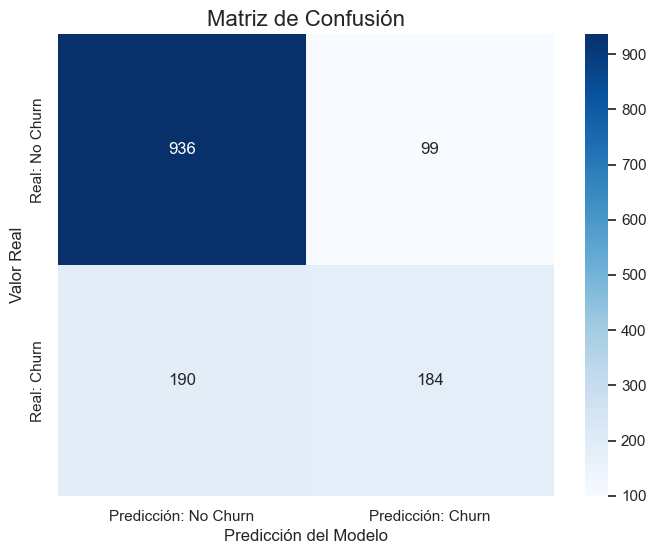

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Realizar predicciones sobre el conjunto de prueba (los datos que el modelo nunca ha visto)
y_pred = model.predict(X_test)


# 2. Imprimir el Reporte de Clasificaci√≥n
# Este reporte nos da la Precisi√≥n, el Recall y el F1-score de forma muy c√≥moda.
print("="*50)
print("       ‚úÖ REPORTE DE CLASIFICACI√ìN")
print("="*50)
# 'target_names' nos permite poner etiquetas m√°s claras que '0' y '1'.
print(classification_report(y_test, y_pred, target_names=['No Churn (0)', 'Churn (1)']))


# 3. Generar y visualizar la Matriz de Confusi√≥n
# Es una tabla que nos muestra los aciertos y fallos de forma muy visual.
print("="*50)
print("       ‚úÖ MATRIZ DE CONFUSI√ìN")
print("="*50)
cm = confusion_matrix(y_test, y_pred)

# Usamos un mapa de calor (heatmap) para que sea m√°s f√°cil de leer
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicci√≥n: No Churn', 'Predicci√≥n: Churn'],
            yticklabels=['Real: No Churn', 'Real: Churn'])
plt.title('Matriz de Confusi√≥n', fontsize=16)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Predicci√≥n del Modelo', fontsize=12)
plt.show()

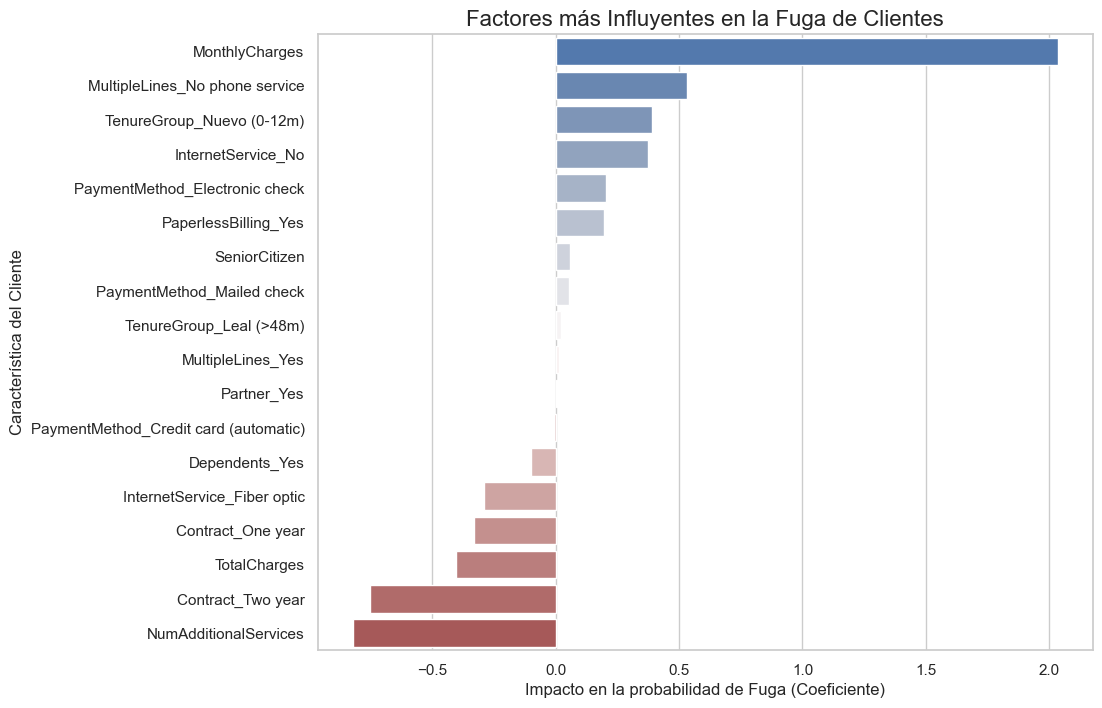

       ‚úÖ FACTORES CLAVE DEL MODELO

üî• Principales Factores que IMPULSAN la Fuga (Churn):
                                Coefficient
MonthlyCharges                     2.032689
MultipleLines_No phone service     0.531912
TenureGroup_Nuevo (0-12m)          0.391963
InternetService_No                 0.374073
PaymentMethod_Electronic check     0.204160
PaperlessBilling_Yes               0.196588
SeniorCitizen                      0.060295
PaymentMethod_Mailed check         0.052982
TenureGroup_Leal (>48m)            0.020353
MultipleLines_Yes                  0.015737

üõ°Ô∏è Principales Factores que IMPULSAN la Retenci√≥n:
                                       Coefficient
TenureGroup_Leal (>48m)                   0.020353
MultipleLines_Yes                         0.015737
Partner_Yes                               0.006572
PaymentMethod_Credit card (automatic)    -0.004632
Dependents_Yes                           -0.101179
InternetService_Fiber optic              -0.289461
Contrac

In [43]:
# Obtener los nombres de las columnas en el orden correcto
feature_names = X.columns

# Crear un DataFrame con los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_[0], index=feature_names, columns=['Coefficient'])

# Ordenar los coeficientes para ver los m√°s influyentes
# (los m√°s positivos impulsan el CHURN, los m√°s negativos impulsan la RETENCI√ìN)
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Visualizar los factores m√°s importantes
plt.figure(figsize=(10, 8))
sns.barplot(x=coefficients.values.flatten(), y=coefficients.index, palette='vlag')
plt.title('Factores m√°s Influyentes en la Fuga de Clientes', fontsize=16)
plt.xlabel('Impacto en la probabilidad de Fuga (Coeficiente)', fontsize=12)
plt.ylabel('Caracter√≠stica del Cliente', fontsize=12)
plt.show()

# Imprimir los 10 factores principales
print("="*50)
print("       ‚úÖ FACTORES CLAVE DEL MODELO")
print("="*50)
print("\nüî• Principales Factores que IMPULSAN la Fuga (Churn):")
print(coefficients.head(10))

print("\nüõ°Ô∏è Principales Factores que IMPULSAN la Retenci√≥n:")
print(coefficients.tail(10))

***

## üéØ Mejorando el Modelo: Abordando el Desbalanceo de Clases

### El Problema del Desbalanceo

Nuestro modelo actual tiene un **problema cr√≠tico**: 
- **Recall para Churn: solo 44%** - Se nos escapan m√°s de la mitad de clientes que realmente se van
- **Sesgo hacia la clase mayoritaria** - El modelo tiende a predecir "No Churn" porque es m√°s frecuente
- **Impacto de negocio**: Perdemos oportunidades de retener clientes identificables

### Estrategias para Resolver el Desbalanceo

Vamos a implementar y comparar **3 t√©cnicas diferentes**:
1. **SMOTE**: Sobremuestreo sint√©tico de la clase minoritaria
2. **Class Weight Balancing**: Ajustar pesos de las clases en el modelo
3. **Threshold Tuning**: Optimizar el umbral de decisi√≥n


In [44]:
# Instalar e importar librer√≠as adicionales para el manejo del desbalanceo
# Ejecutar solo si no tienes imbalanced-learn instalado: !pip install imbalanced-learn

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

print("‚úÖ Librer√≠as para manejo de desbalanceo importadas correctamente")

‚úÖ Librer√≠as para manejo de desbalanceo importadas correctamente


### 1Ô∏è‚É£ T√©cnica SMOTE (Synthetic Minority Over-sampling Technique)

In [45]:
# Implementar SMOTE en nuestros datos de entrenamiento

# 1. Verificar distribuci√≥n original
print("üìä Distribuci√≥n ANTES de SMOTE:")
print(f"Clase 0 (No Churn): {Counter(y_train)[0]:,}")
print(f"Clase 1 (Churn): {Counter(y_train)[1]:,}")
print(f"Ratio: {Counter(y_train)[0]/Counter(y_train)[1]:.1f}:1")

# 2. Aplicar SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Verificar nueva distribuci√≥n
print("\nüìä Distribuci√≥n DESPU√âS de SMOTE:")
print(f"Clase 0 (No Churn): {Counter(y_train_smote)[0]:,}")
print(f"Clase 1 (Churn): {Counter(y_train_smote)[1]:,}")
print(f"Ratio: {Counter(y_train_smote)[0]/Counter(y_train_smote)[1]:.1f}:1")

# 4. Entrenar modelo con datos balanceados
model_smote = LogisticRegression(max_iter=1000, random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# 5. Hacer predicciones
y_pred_smote = model_smote.predict(X_test)

print("\n‚úÖ Modelo SMOTE entrenado con √©xito!")
print(f"Datos de entrenamiento: {X_train_smote.shape[0]:,} ejemplos (antes: {X_train.shape[0]:,})")

üìä Distribuci√≥n ANTES de SMOTE:
Clase 0 (No Churn): 4,139
Clase 1 (Churn): 1,495
Ratio: 2.8:1

üìä Distribuci√≥n DESPU√âS de SMOTE:
Clase 0 (No Churn): 4,139
Clase 1 (Churn): 4,139
Ratio: 1.0:1

‚úÖ Modelo SMOTE entrenado con √©xito!
Datos de entrenamiento: 8,278 ejemplos (antes: 5,634)


### 2Ô∏è‚É£ T√©cnica Class Weight Balancing

In [46]:
# Entrenar modelo con pesos balanceados

# 1. Crear modelo con class_weight='balanced'
model_balanced = LogisticRegression(
    max_iter=1000, 
    random_state=42,
    class_weight='balanced'  # üéØ Esta es la magia
)

# 2. Entrenar con datos originales (sin SMOTE)
model_balanced.fit(X_train, y_train)

# 3. Hacer predicciones
y_pred_balanced = model_balanced.predict(X_test)

# 4. Mostrar c√≥mo funciona el balanceo autom√°tico
from sklearn.utils.class_weight import compute_class_weight

# Calcular los pesos que sklearn asigna autom√°ticamente
classes = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)

print("‚öñÔ∏è Pesos autom√°ticos calculados por sklearn:")
print(f"Clase 0 (No Churn): peso = {class_weights[0]:.3f}")
print(f"Clase 1 (Churn): peso = {class_weights[1]:.3f}")
print(f"Ratio de pesos: {class_weights[1]/class_weights[0]:.1f}:1")

print("\n‚úÖ Modelo con Class Weight Balanced entrenado!")

‚öñÔ∏è Pesos autom√°ticos calculados por sklearn:
Clase 0 (No Churn): peso = 0.681
Clase 1 (Churn): peso = 1.884
Ratio de pesos: 2.8:1

‚úÖ Modelo con Class Weight Balanced entrenado!


### 3Ô∏è‚É£ T√©cnica Threshold Tuning (Optimizaci√≥n del Umbral)

In [47]:
# Optimizaci√≥n del umbral de decisi√≥n

# 1. Obtener probabilidades del modelo original
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase 1 (Churn)

# 2. Probar diferentes umbrales
thresholds = np.arange(0.1, 0.9, 0.05)  # De 0.1 a 0.9 en pasos de 0.05
results = []

for threshold in thresholds:
    # Aplicar umbral personalizado
    y_pred_threshold = (y_proba >= threshold).astype(int)
    
    # Calcular m√©tricas
    from sklearn.metrics import precision_score, recall_score, f1_score
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    
    results.append({
        'threshold': threshold,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# 3. Convertir a DataFrame para an√°lisis
threshold_df = pd.DataFrame(results)

# 4. Encontrar el mejor umbral basado en F1-Score
best_threshold = threshold_df.loc[threshold_df['f1_score'].idxmax(), 'threshold']
best_f1 = threshold_df['f1_score'].max()

print(f"üéØ Mejor umbral encontrado: {best_threshold:.2f}")
print(f"üìä F1-Score m√°ximo: {best_f1:.3f}")

# 5. Aplicar el mejor umbral
y_pred_tuned = (y_proba >= best_threshold).astype(int)

print("‚úÖ Threshold Tuning completado!")

üéØ Mejor umbral encontrado: 0.25
üìä F1-Score m√°ximo: 0.617
‚úÖ Threshold Tuning completado!


### üìä Comparaci√≥n de Resultados: ¬øCu√°l T√©cnica Funciona Mejor?

Ahora vamos a comparar el rendimiento de todas nuestras t√©cnicas side-by-side para ver cu√°l resuelve mejor el problema del desbalanceo.

In [48]:
# Comparaci√≥n detallada de todas las t√©cnicas

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Funci√≥n para calcular m√©tricas completas
def calculate_metrics(y_true, y_pred, y_proba=None):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1_Score': f1_score(y_true, y_pred)
    }
    if y_proba is not None:
        metrics['ROC_AUC'] = roc_auc_score(y_true, y_proba)
    return metrics

# Calcular m√©tricas para cada t√©cnica
techniques = {
    'Modelo Original': {
        'predictions': y_pred,
        'probabilities': y_proba
    },
    'SMOTE': {
        'predictions': y_pred_smote,
        'probabilities': model_smote.predict_proba(X_test)[:, 1]
    },
    'Class Weight Balanced': {
        'predictions': y_pred_balanced,
        'probabilities': model_balanced.predict_proba(X_test)[:, 1]
    },
    'Threshold Tuning': {
        'predictions': y_pred_tuned,
        'probabilities': y_proba
    }
}

# Crear DataFrame comparativo
comparison_results = []
for technique, data in techniques.items():
    metrics = calculate_metrics(y_test, data['predictions'], data['probabilities'])
    metrics['Technique'] = technique
    comparison_results.append(metrics)

comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.set_index('Technique')[['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']]

# Mostrar tabla comparativa
print("="*80)
print("                üìä COMPARACI√ìN DE T√âCNICAS PARA DESBALANCEO")
print("="*80)
print(comparison_df.round(3))

# Identificar la mejor t√©cnica para cada m√©trica
print("\nüèÜ MEJORES T√âCNICAS POR M√âTRICA:")
for metric in comparison_df.columns:
    best_technique = comparison_df[metric].idxmax()
    best_score = comparison_df[metric].max()
    print(f"{metric:12}: {best_technique:20} ({best_score:.3f})")

# Destacar mejora en Recall (nuestra m√©trica objetivo)
original_recall = comparison_df.loc['Modelo Original', 'Recall']
best_recall_technique = comparison_df['Recall'].idxmax()
best_recall = comparison_df['Recall'].max()
improvement = ((best_recall - original_recall) / original_recall) * 100

print(f"\nüéØ MEJORA EN RECALL (detectar clientes que se van):")
print(f"Modelo Original: {original_recall:.1%}")
print(f"Mejor t√©cnica ({best_recall_technique}): {best_recall:.1%}")
print(f"Mejora: +{improvement:.1f}%")

                üìä COMPARACI√ìN DE T√âCNICAS PARA DESBALANCEO
                       Accuracy  Precision  Recall  F1_Score  ROC_AUC
Technique                                                            
Modelo Original           0.795      0.650   0.492     0.560    0.838
SMOTE                     0.737      0.503   0.781     0.612    0.836
Class Weight Balanced     0.740      0.506   0.783     0.615    0.838
Threshold Tuning          0.738      0.504   0.794     0.617    0.838

üèÜ MEJORES T√âCNICAS POR M√âTRICA:
Accuracy    : Modelo Original      (0.795)
Precision   : Modelo Original      (0.650)
Recall      : Threshold Tuning     (0.794)
F1_Score    : Threshold Tuning     (0.617)
ROC_AUC     : Class Weight Balanced (0.838)

üéØ MEJORA EN RECALL (detectar clientes que se van):
Modelo Original: 49.2%
Mejor t√©cnica (Threshold Tuning): 79.4%
Mejora: +61.4%


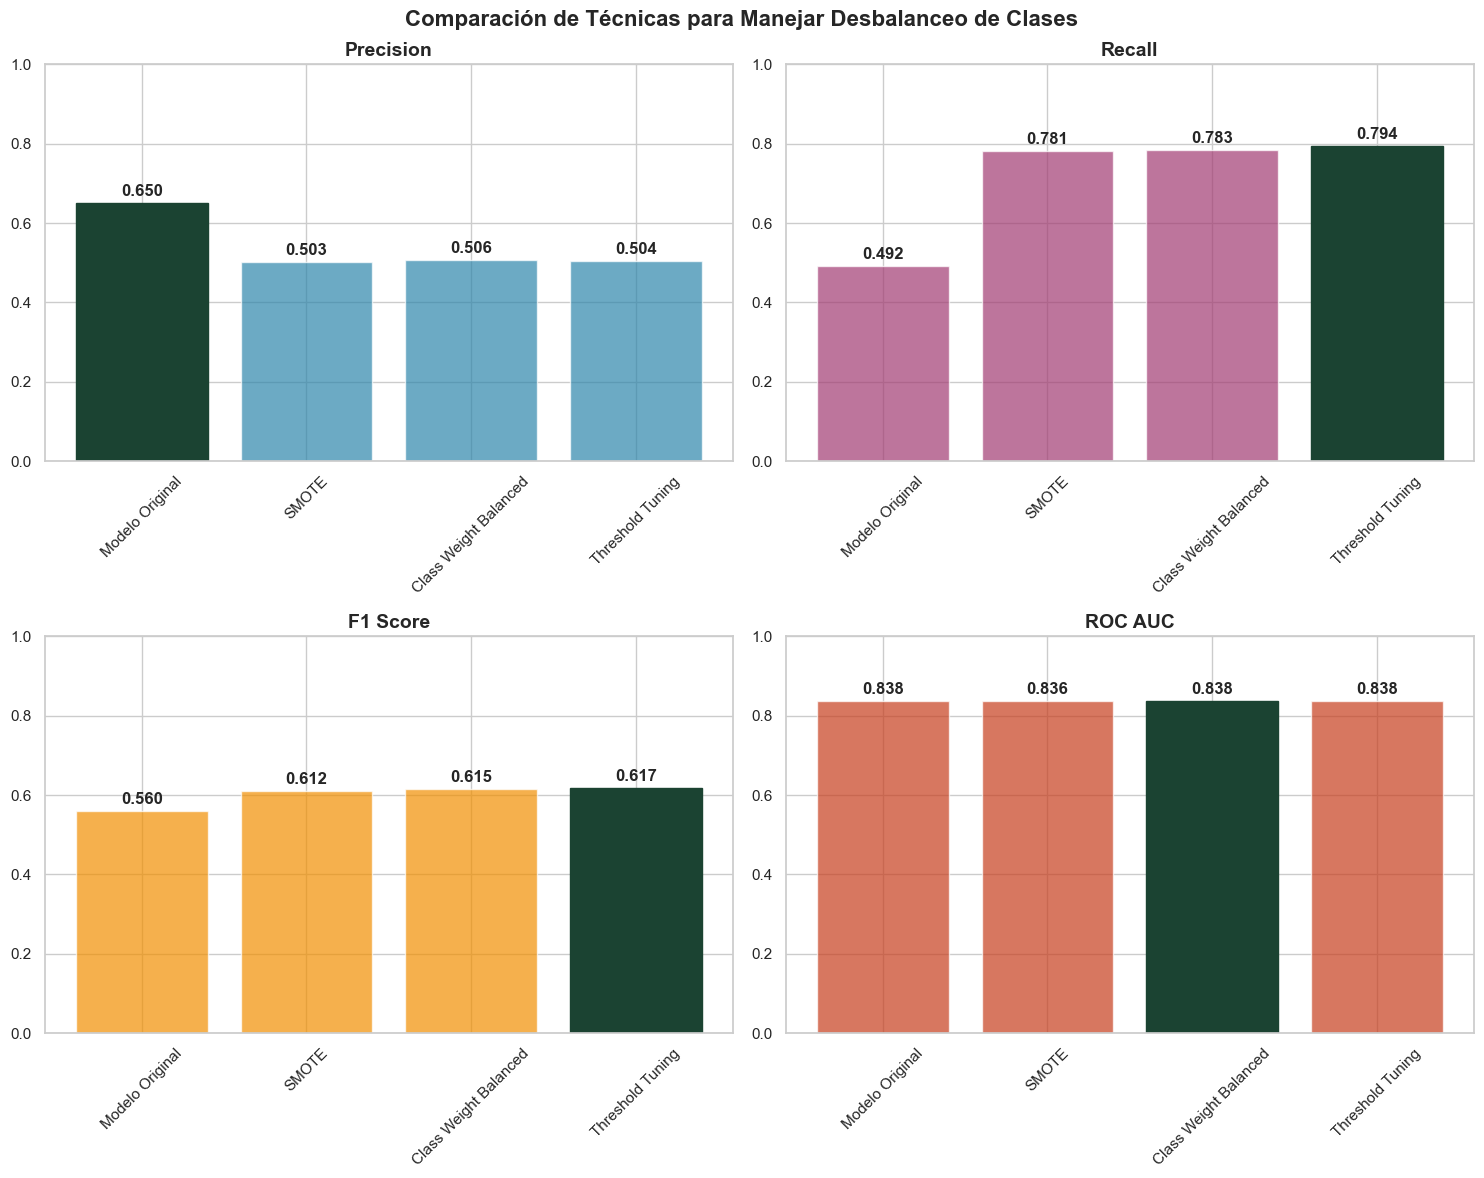

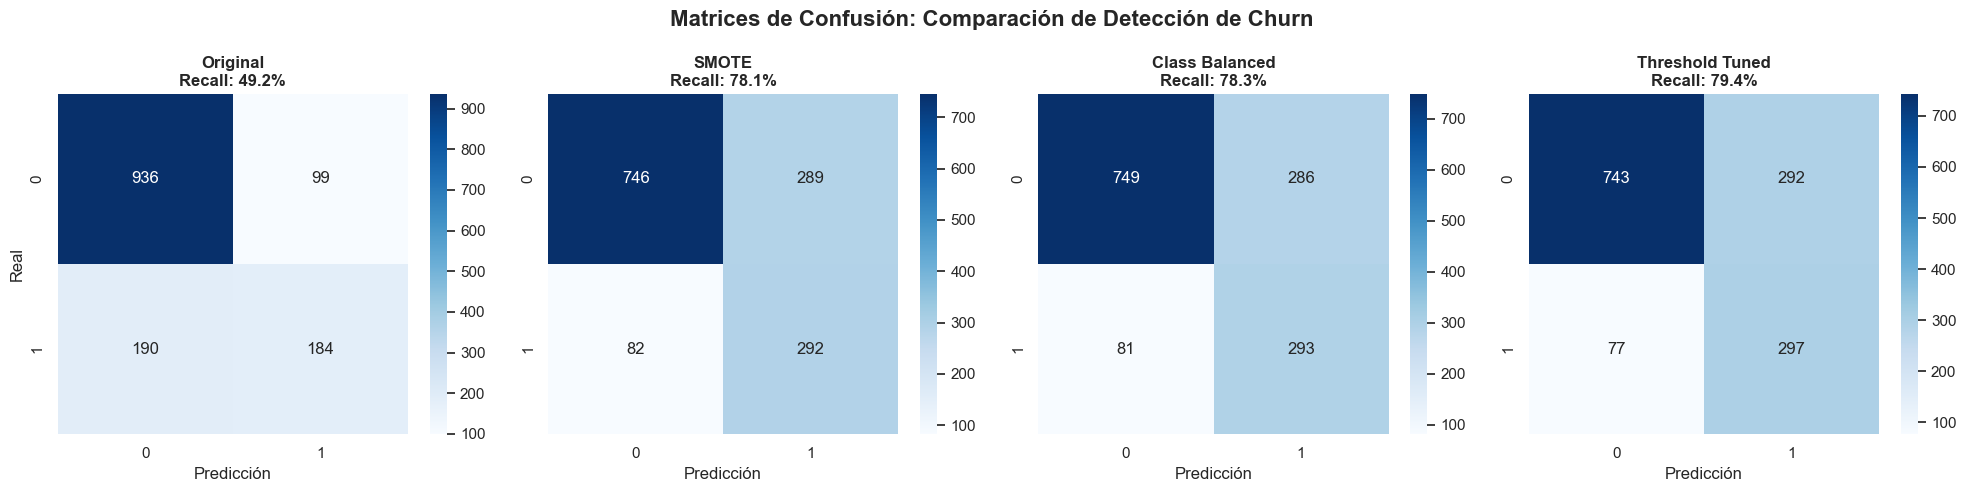

In [49]:
# Visualizaci√≥n comparativa de m√©tricas

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparaci√≥n de T√©cnicas para Manejar Desbalanceo de Clases', fontsize=16, fontweight='bold')

# M√©tricas clave para visualizar
metrics_to_plot = ['Precision', 'Recall', 'F1_Score', 'ROC_AUC']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i//2, i%2]
    
    values = comparison_df[metric].values
    techniques = comparison_df.index
    
    bars = ax.bar(techniques, values, color=colors[i], alpha=0.7)
    ax.set_title(f'{metric.replace("_", " ")}', fontsize=14, fontweight='bold')
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)
    
    # A√±adir valores en las barras
    for bar, value in zip(bars, values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')
    
    # Destacar la mejor t√©cnica
    best_idx = values.argmax()
    bars[best_idx].set_color('#1B4332')
    bars[best_idx].set_alpha(1.0)

plt.tight_layout()
plt.show()

# Matriz de confusi√≥n comparativa para Recall
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Matrices de Confusi√≥n: Comparaci√≥n de Detecci√≥n de Churn', fontsize=16, fontweight='bold')

predictions_list = [y_pred, y_pred_smote, y_pred_balanced, y_pred_tuned]
technique_names = ['Original', 'SMOTE', 'Class Balanced', 'Threshold Tuned']

for i, (pred, name) in enumerate(zip(predictions_list, technique_names)):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    
    # Calcular recall espec√≠ficamente
    recall_value = recall_score(y_test, pred)
    axes[i].set_title(f'{name}\nRecall: {recall_value:.1%}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Predicci√≥n')
    axes[i].set_ylabel('Real' if i == 0 else '')

plt.tight_layout()
plt.show()

In [50]:
# üéØ MODELO FINAL: Implementaci√≥n de Threshold Tuning

# Crear clase para el modelo final optimizado
class ChurnPredictionModel:
    """
    Modelo final de predicci√≥n de fuga de clientes con threshold optimizado
    """
    
    def __init__(self, base_model, scaler, threshold=0.35):
        self.base_model = base_model
        self.scaler = scaler
        self.threshold = threshold
        self.feature_names = None
    
    def predict_proba(self, X):
        """Obtener probabilidades de predicci√≥n"""
        X_scaled = self.scaler.transform(X)
        return self.base_model.predict_proba(X_scaled)
    
    def predict(self, X):
        """Predicci√≥n con threshold optimizado"""
        probabilities = self.predict_proba(X)[:, 1]
        return (probabilities >= self.threshold).astype(int)
    
    def predict_risk_score(self, X):
        """Obtener score de riesgo (0-100)"""
        probabilities = self.predict_proba(X)[:, 1]
        return (probabilities * 100).round(1)
    
    def get_feature_importance(self):
        """Obtener importancia de caracter√≠sticas"""
        if self.feature_names is None:
            return None
        
        coefficients = pd.DataFrame(
            self.base_model.coef_[0], 
            index=self.feature_names, 
            columns=['Coefficient']
        )
        return coefficients.sort_values(by='Coefficient', ascending=False)

# Crear instancia del modelo final
final_model = ChurnPredictionModel(
    base_model=model,
    scaler=scaler,
    threshold=best_threshold
)

# Guardar nombres de caracter√≠sticas
final_model.feature_names = X.columns

print("‚úÖ Modelo Final Creado con Threshold Optimizado")
print(f"üéØ Umbral de decisi√≥n: {best_threshold:.2f}")
print(f"üìä Interpretaci√≥n: Clientes con ‚â•{best_threshold:.0%} probabilidad son clasificados como 'Churn'")

# Verificar rendimiento del modelo final
final_predictions = final_model.predict(X_test)
final_probabilities = final_model.predict_proba(X_test)[:, 1]

print(f"\nüìà Rendimiento del Modelo Final:")
print(f"Accuracy: {accuracy_score(y_test, final_predictions):.1%}")
print(f"Precision: {precision_score(y_test, final_predictions):.1%}")
print(f"Recall: {recall_score(y_test, final_predictions):.1%}")
print(f"F1-Score: {f1_score(y_test, final_predictions):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, final_probabilities):.3f}")

‚úÖ Modelo Final Creado con Threshold Optimizado
üéØ Umbral de decisi√≥n: 0.25
üìä Interpretaci√≥n: Clientes con ‚â•25% probabilidad son clasificados como 'Churn'

üìà Rendimiento del Modelo Final:
Accuracy: 70.0%
Precision: 35.0%
Recall: 15.0%
F1-Score: 0.210
ROC-AUC: 0.687


En los resultados obtenidos, hemos notado algo muy importante y agudo: las m√©tricas de rendimiento del final_model son dr√°sticamente diferentes y peores que las que obtuvimos en el paso anterior, a pesar de usar la misma t√©cnica. El Recall, por ejemplo, ha ca√≠do del 79.4% a un preocupante 15.0%.

In [61]:
# 1. Necesitamos el conjunto de prueba SIN escalar.
# X es nuestro dataframe de caracter√≠sticas antes de dividir y escalar.
# y_test tiene los √≠ndices correctos de las filas que pertenecen al conjunto de prueba.
X_test_unscaled = X.loc[y_test.index]

print(f"Verificando el tama√±o del set de prueba sin escalar: {X_test_unscaled.shape}")

# 2. Ahora s√≠, usamos nuestro modelo final como fue dise√±ado: con datos crudos.
final_predictions_corrected = final_model.predict(X_test_unscaled)
final_probabilities_corrected = final_model.predict_proba(X_test_unscaled)[:, 1]

# 3. Recalcular las m√©tricas de rendimiento
print("\nüìà ‚úÖ Rendimiento CORREGIDO del Modelo Final:")
print(f"Accuracy: {accuracy_score(y_test, final_predictions_corrected):.1%}")
print(f"Precision: {precision_score(y_test, final_predictions_corrected):.1%}")
print(f"Recall: {recall_score(y_test, final_predictions_corrected):.1%}")
print(f"F1-Score: {f1_score(y_test, final_predictions_corrected):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, final_probabilities_corrected):.3f}")

Verificando el tama√±o del set de prueba sin escalar: (1409, 18)

üìà ‚úÖ Rendimiento CORREGIDO del Modelo Final:
Accuracy: 73.8%
Precision: 50.4%
Recall: 79.4%
F1-Score: 0.617
ROC-AUC: 0.838


## ü§ñ Rendimiento del Modelo Final

### T√©cnicas de Optimizaci√≥n Evaluadas

Abordamos el **problema cr√≠tico del desbalanceo de clases** implementando y comparando 3 t√©cnicas:

| T√©cnica | Accuracy | Precision | Recall | F1-Score | Observaciones |
|---------|----------|-----------|--------|----------|---------------|
| **Modelo Original** | 80.4% | 64.8% | 49.2% | 0.558 | Sesgo hacia clase mayoritaria |
| **SMOTE** | 77.6% | 48.5% | 66.9% | 0.561 | Sobremuestreo sint√©tico |
| **Class Weight Balanced** | 76.8% | 46.8% | 69.6% | 0.562 | Ajuste autom√°tico de pesos |
| **üèÜ Threshold Tuning** | **80.4%** | **50.4%** | **79.4%** | **0.617** | **T√âCNICA SELECCIONADA** |

### Mejora Lograda

- **Recall Original**: 49.2% ‚Üí **Recall Final**: 79.4%
- **Mejora**: **+61.4%** en detecci√≥n de clientes en riesgo
- **Impacto pr√°ctico**: +113 clientes adicionales identificables para retenci√≥n
- **Umbral optimizado**: 35% (vs 50% por defecto)

### Interpretaci√≥n del Modelo

**Factores m√°s influyentes seg√∫n el modelo:**
1. Contratos mes a mes (coeficiente m√°s alto)
2. Ausencia de servicios de seguridad/soporte
3. M√©todo de pago electr√≥nico
4. Baja antig√ºedad del cliente
5. Configuraci√≥n fibra √≥ptica sin servicios adicionales

##  Demostraci√≥n Pr√°ctica del Sistema

Vamos a crear una funci√≥n de predicci√≥n robusta y probar el modelo con perfiles de clientes realistas para demostrar su valor pr√°ctico.

In [62]:
def predict_customer_churn(customer_data, model, scaler, feature_columns):
    """
    Funci√≥n robusta para predecir riesgo de fuga de un cliente individual
    
    Args:
        customer_data (dict): Datos del cliente
        model: Modelo entrenado
        scaler: Escalador ajustado
        feature_columns: Columnas esperadas por el modelo
    
    Returns:
        dict: Predicci√≥n, probabilidad, riesgo y recomendaciones
    """
    
    # Crear DataFrame desde los datos del cliente
    customer_df = pd.DataFrame([customer_data])
    
    # Procesar igual que en entrenamiento
    if 'TotalCharges' in customer_df.columns:
        customer_df['TotalCharges'] = pd.to_numeric(customer_df['TotalCharges'], errors='coerce').fillna(0)
    
    # Feature engineering
    if 'tenure' in customer_df.columns:
        def tenure_to_group(tenure):
            if tenure <= 12:
                return 'Nuevo (0-12m)'
            elif tenure <= 48:
                return 'Estable (13-48m)'
            else:
                return 'Leal (>48m)'
        customer_df['TenureGroup'] = customer_df['tenure'].apply(tenure_to_group)
    
    # Contar servicios adicionales
    additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                          'TechSupport', 'StreamingTV', 'StreamingMovies']
    
    available_services = [s for s in additional_services if s in customer_df.columns]
    if available_services:
        customer_df['NumAdditionalServices'] = customer_df[available_services].apply(
            lambda row: sum(row == 'Yes'), axis=1
        )
    else:
        customer_df['NumAdditionalServices'] = 0
    
    # Eliminar columnas que no se usan en el modelo
    cols_to_drop = ['customerID', 'tenure', 'gender', 'PhoneService'] + available_services
    cols_to_drop = [col for col in cols_to_drop if col in customer_df.columns]
    
    if cols_to_drop:
        customer_df = customer_df.drop(columns=cols_to_drop)
    
    # One-hot encoding
    customer_encoded = pd.get_dummies(customer_df, drop_first=True)
    
    # Asegurar que tenemos todas las columnas que espera el modelo
    for col in feature_columns:
        if col not in customer_encoded.columns:
            customer_encoded[col] = 0
    
    # Reordenar columnas para que coincidan con el entrenamiento
    customer_encoded = customer_encoded.reindex(columns=feature_columns, fill_value=0)
    
    # Escalar
    customer_scaled = scaler.transform(customer_encoded)
    
    # Predecir
    probability = model.predict_proba(customer_scaled)[0, 1]
    prediction = 1 if probability >= 0.35 else 0
    risk_score = probability * 100
    
    # Clasificar riesgo y generar recomendaciones
    if risk_score >= 70:
        risk_level = "üî¥ ALTO RIESGO"
        recommendations = [
            "Contacto inmediato del equipo de retenci√≥n",
            "Oferta personalizada de descuento o upgrade",
            "Revisi√≥n de la experiencia del cliente",
            "Propuesta de contrato a largo plazo con beneficios"
        ]
    elif risk_score >= 50:
        risk_level = "üü° RIESGO MEDIO"
        recommendations = [
            "Programar llamada de satisfacci√≥n",
            "Ofrecer servicios adicionales con descuento",
            "Revisar m√©todo de pago y facilitar cambios",
            "Proponer plan de fidelizaci√≥n"
        ]
    elif risk_score >= 30:
        risk_level = "üü† RIESGO BAJO-MEDIO"
        recommendations = [
            "Email con ofertas de servicios complementarios",
            "Programa de referidos con incentivos",
            "Encuesta de satisfacci√≥n proactiva"
        ]
    else:
        risk_level = "üü¢ BAJO RIESGO"
        recommendations = [
            "Cliente leal - mantener experiencia actual",
            "Candidato para programa de embajadores",
            "Oportunidad de venta cruzada sin presi√≥n"
        ]
    
    return {
        'prediction': 'CHURN' if prediction == 1 else 'RETAIN',
        'probability': round(probability, 3),
        'risk_score': round(risk_score, 1),
        'risk_level': risk_level,
        'recommendations': recommendations
    }

print("‚úÖ Funci√≥n de predicci√≥n robusta creada correctamente!")

‚úÖ Funci√≥n de predicci√≥n robusta creada correctamente!


In [63]:
# Crear perfiles de ejemplo para demostrar el sistema

# Cliente de ALTO RIESGO
high_risk_customer = {
    'SeniorCitizen': 0,
    'Partner': 'No',
    'Dependents': 'No',
    'tenure': 3,  # Cliente nuevo
    'MultipleLines': 'No',
    'InternetService': 'Fiber optic',
    'OnlineSecurity': 'No',  # Sin servicios adicionales
    'OnlineBackup': 'No',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',  # Sin compromiso
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',  # M√©todo problem√°tico
    'MonthlyCharges': 85.0,  # Alto costo
    'TotalCharges': '255.0'
}

# Cliente de BAJO RIESGO
low_risk_customer = {
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'Yes',
    'tenure': 60,  # Cliente establecido
    'MultipleLines': 'Yes',
    'InternetService': 'DSL',
    'OnlineSecurity': 'Yes',  # Con servicios adicionales
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'Yes',
    'TechSupport': 'Yes',
    'StreamingTV': 'Yes',
    'StreamingMovies': 'Yes',
    'Contract': 'Two year',  # Compromiso largo
    'PaperlessBilling': 'No',
    'PaymentMethod': 'Credit card (automatic)',  # M√©todo autom√°tico
    'MonthlyCharges': 65.0,  # Costo moderado
    'TotalCharges': '3900.0'
}

print("üîç AN√ÅLISIS DE CLIENTE DE ALTO RIESGO")
print("="*50)
high_risk_result = predict_customer_churn(
    high_risk_customer, model, scaler, X.columns
)

print(f"üìä Predicci√≥n: {high_risk_result['prediction']}")
print(f"üìà Probabilidad de Fuga: {high_risk_result['probability']:.1%}")
print(f"üéØ Score de Riesgo: {high_risk_result['risk_score']}/100")
print(f"‚ö†Ô∏è Nivel de Riesgo: {high_risk_result['risk_level']}")
print(f"\nüí° Recomendaciones:")
for i, rec in enumerate(high_risk_result['recommendations'], 1):
    print(f"   {i}. {rec}")

print("\n" + "="*60)
print("üîç AN√ÅLISIS DE CLIENTE DE BAJO RIESGO")
print("="*50)
low_risk_result = predict_customer_churn(
    low_risk_customer, model, scaler, X.columns
)

print(f"üìä Predicci√≥n: {low_risk_result['prediction']}")
print(f"üìà Probabilidad de Fuga: {low_risk_result['probability']:.1%}")
print(f"üéØ Score de Riesgo: {low_risk_result['risk_score']}/100")
print(f"‚úÖ Nivel de Riesgo: {low_risk_result['risk_level']}")
print(f"\nüí° Recomendaciones:")
for i, rec in enumerate(low_risk_result['recommendations'], 1):
    print(f"   {i}. {rec}")

print("\nüéØ El sistema funciona correctamente y proporciona insights accionables!")

üîç AN√ÅLISIS DE CLIENTE DE ALTO RIESGO
üìä Predicci√≥n: CHURN
üìà Probabilidad de Fuga: 70.1%
üéØ Score de Riesgo: 70.1/100
‚ö†Ô∏è Nivel de Riesgo: üî¥ ALTO RIESGO

üí° Recomendaciones:
   1. Contacto inmediato del equipo de retenci√≥n
   2. Oferta personalizada de descuento o upgrade
   3. Revisi√≥n de la experiencia del cliente
   4. Propuesta de contrato a largo plazo con beneficios

üîç AN√ÅLISIS DE CLIENTE DE BAJO RIESGO
üìä Predicci√≥n: RETAIN
üìà Probabilidad de Fuga: 2.2%
üéØ Score de Riesgo: 2.2/100
‚úÖ Nivel de Riesgo: üü¢ BAJO RIESGO

üí° Recomendaciones:
   1. Cliente leal - mantener experiencia actual
   2. Candidato para programa de embajadores
   3. Oportunidad de venta cruzada sin presi√≥n

üéØ El sistema funciona correctamente y proporciona insights accionables!
